In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_stocks_5yr.csv")

# Filtrar por Apple (AAPL)
apple = df[df["Name"] == "AAPL"].sort_values("date")
apple['date'] = pd.to_datetime(apple['date'])
# Ver los primeros registros
print(apple.head())

           date     open     high      low    close     volume  Name
1259 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1260 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
1261 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
1262 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
1263 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [5]:
apple.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(apple[["close"]])

def create_dataset(dataset, look_back=60):
    X, y = [], []

    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])

    return np.array(X), np.array(y)


In [7]:
train_size = int(len(train_scaled) * 0.8)
train, test = train_scaled[:train_size], train_scaled[train_size:]

X_train, y_train = create_dataset(train, 60)
X_test, y_test = create_dataset(test, 60)

# Reshape para LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
model = Sequential([
    LSTM(100, input_shape=(X_trian.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mse') # Using Adam optimizer and Mean Squared Error loss


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X_trian,y_trian, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0445
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0014
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 8.7013e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0011
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0011
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 9.2978e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0011
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 8.9653e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 9.2867e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 9.2681e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 7.3377e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 7.9393e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━

In [12]:
predicted_stock_price = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mostrar resultados (puedes modificar esto según lo que necesites)
print("Predicciones:", predicted_stock_price[:5])  # Imprimir las primeras predicciones
print("Valores reales:", y_test_actual[:5])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Predicciones: [[146.78185]
 [147.50137]
 [149.37933]
 [151.49101]
 [152.8659 ]]
Valores reales: [[148.96]
 [153.01]
 [153.99]
 [153.26]
 [153.95]]


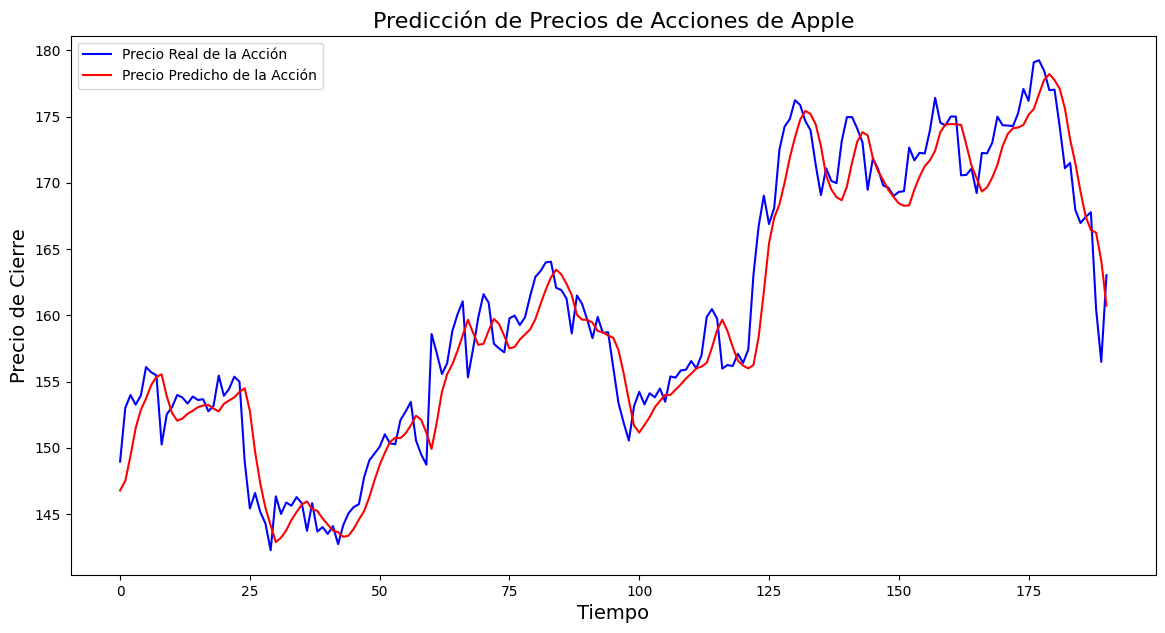

In [13]:
# Graficar los resultados
plt.figure(figsize=(14, 7))

# Graficar los precios reales (valores de prueba)
plt.plot(y_test_actual, color='blue', label='Precio Real de la Acción')

# Graficar los precios predichos
plt.plot(predicted_stock_price, color='red', label='Precio Predicho de la Acción')

# Agregar títulos y etiquetas
plt.title('Predicción de Precios de Acciones de Apple', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Precio de Cierre', fontsize=14)

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()